All imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import redshift_connector
import seaborn as sns
import os
from datetime import datetime
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM


In [2]:
random_number = random.randint(1, 1000)
# Get the current date and time
now = datetime.now()
formatted_now = now.strftime("%Y_%m_%d_%H_%M_%S")
print("Formatted date and time:", formatted_now)
# Specify the directory path where you want to save the CSV file
directory = f'IncludingFailed_Dirves_Standardization_{formatted_now}_{random_number}'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

Formatted date and time: 2024_04_06_22_58_44


Connect to DB and fetch data

In [3]:
conn = redshift_connector.connect(
    host='abcd',
    port=5439,
    database='abcd',
    user='abcd',
    password='abcd'
)
cursor = conn.cursor()
df_main = pd.DataFrame()

failed_serial_numbers_array = ['A08B442B','A083A861','A08B3685','A084F1C0','A084F1C6','A0750CD2','A075095D','A0760952','A075F352','A08B37E7','A076D77F','A08B3900','A08AA520','A084440B','A0772938','A084D9E2','A0845370','A0844F7D','A0845134','A084564B','A0879841','A0844A97','A0751C24','A07505EE','A07508CE','A07507F0','A0761540','A075BBD0','A075BCAA','A0845189','A08282E6','A087C130','A085127A','A084F5AD','A074FAE2','A084B845','A089262D','A076D9C8','A08AB72A','A08C4262','A08C3FBE','A08B2744','A076D841','A076BB9C','A075186E','A076B86F','A08AC4C5','A08B6867','A08ACF71','A08B4EAE','A08B4B1C','A08B47DE','A08B30A4','A05D923D','A05D9068','A05D9473','A05D9441','A067CE75','A067CE63','A067CE7B','A067CE7D','A067CE71','A05D2331','A05FD059','A0664AB0','A066E204','A067208A','A066E2FB','A0665522','A0667F0D','A066302C','A06641ED','A066426E','A0664329','A066432B','A0680043','A0661608','A0674066','A06744E3','A0674517','A067870C','A067871D','A0660CF8','A06617CE','A06638C4','A0664012','A06647DE','A0664C05','A0671569','A067341A','A06734C4','A067E58E','A06CA94B','A0664108','A06734BD','A0597141','A0651B4D','A066648F','A0671695','A067F9CE','A067FDBB','A067FEE0','A07105B8','A06CE1D7','A06EA6C0','A06EC7F2','A06EFCD6','A07076CF','A06733D5','A067E427','A067E58C','A0660F4B','A066154C','A06731D8','A06ADF21','A06D4039','A06ADF1F','A06636CD','A06813E9','A068174E','A0681884','A0681D9A','A06CD1BE','A070A35C','A06D0D27','A070695E','A06E15B6','A06E163D','A06DF7FA','A06DF8F3','A071BA66','A071BEF7','A071B48D','A071B6A7','A071B799','A071C745','A06C4705','A06CCF6A','A06CE1C1','A071C801','A071B3FA','A05BEECB','A0660F83','A06646BB','A074D0D7','A06631C1','A06EF466','A06D2E2C','A06F0C8B','A06733AE','A0673140','A0660DBC','A0660CFC','A0673728','A0742E52','A0751683','A072405D','A0648AC6','A0647DE7','A064CC40','A0601CB6','A064CC98','A0671FAF','A0671DF0','A06677B2','A05BE9C0','A06644E9','A067A9B2','A0752D8D','A07435BD','A066453F','A06644A0','A0664251','A0663551','A067E38B','A0727163','A072706F','A07272F6','A07F0850','A07D9935','A07D982F','A07D99D3','A07DA75F','A0655FB5','A06A3718','A06BFA7F','A05CF152','A05CF14F','A0672C8A','A076E1DF','A076E260','A076E28B','A076E21C','A076E209','A065DAE0','A067D784','A06714DC','A05BEC64','A05BEAF7','A0663E30','A067FE16','A06FD48B','A0682226','A069DFA0','A0673112','A076E242','A06603B0','A076E245','A05D234A','A06A3706','A068E9C0','A076E261','A076E1DA','A076E252','A076E20D','A076E1F1','A076E294','A071AE57','A079AD89','A06F87E8','A060E428','A06593C2','A060E840','A061BB91','A067DE1F','A06F8E21','A0614917','A067ADB1','A067194A','A0670D72','A076B461','A076A827','A075BDD6','A0778F8B','A076A20A','A076A228','A076A3A2','A076A79F','A076A7A7','A076B0F6','A076B396','A076B3CD','A076B4AB','A076B56B','A076B5D7','A076A7A8','A06C9E63','A06C9E1B','A076A119','A0769C32','A076A3D3','A075BA26','A0714E15','A07A46DE','A07A467D','A0664BC1','A08A588F','A0672F6A','A07A4659','A066343F','A0664AF4','A06733B6','A0773D2E','A075A5D6','A065FEBF','A0660508','A066082F','A06306E9','A061BE1F','A07A47F6','A06573D8','A0604485','A066B96D','A07D4B62','A07CEF8B','A07CEE05','A07D5F0A','A07D47C0','A0752168','A075218B','A07522AB','A07A46E5','A06F935A','A065B111','A0666C6A','A0661056','A07DA963','A0766FC8','A0666E86','A0718BA9','A0818703','A08186F7','A0818739','A08186FF','A0763BB0','A066A964','A05E17BB','A0601DFA','A06093BE','A066175F','A066361B','A0661748','A0664580','A05EC7EC','A067E552','A0672FEF','A06735C8','A066E0D2','A060DF4A','A065A133','A07E3610','A07E5941','A0637647','A0660AC9','A05F5807','A083A82E','A06F416F','A06F54F4','A079660E']

failed_serial_numbers = "'A08B442B','A083A861','A08B3685','A084F1C0','A084F1C6','A0750CD2','A075095D','A0760952','A075F352','A08B37E7','A076D77F','A08B3900','A08AA520','A084440B','A0772938','A084D9E2','A0845370','A0844F7D','A0845134','A084564B','A0879841','A0844A97','A0751C24','A07505EE','A07508CE','A07507F0','A0761540','A075BBD0','A075BCAA','A0845189','A08282E6','A087C130','A085127A','A084F5AD','A074FAE2','A084B845','A089262D','A076D9C8','A08AB72A','A08C4262','A08C3FBE','A08B2744','A076D841','A076BB9C','A075186E','A076B86F','A08AC4C5','A08B6867','A08ACF71','A08B4EAE','A08B4B1C','A08B47DE','A08B30A4','A05D923D','A05D9068','A05D9473','A05D9441','A067CE75','A067CE63','A067CE7B','A067CE7D','A067CE71','A05D2331','A05FD059','A0664AB0','A066E204','A067208A','A066E2FB','A0665522','A0667F0D','A066302C','A06641ED','A066426E','A0664329','A066432B','A0680043','A0661608','A0674066','A06744E3','A0674517','A067870C','A067871D','A0660CF8','A06617CE','A06638C4','A0664012','A06647DE','A0664C05','A0671569','A067341A','A06734C4','A067E58E','A06CA94B','A0664108','A06734BD','A0597141','A0651B4D','A066648F','A0671695','A067F9CE','A067FDBB','A067FEE0','A07105B8','A06CE1D7','A06EA6C0','A06EC7F2','A06EFCD6','A07076CF','A06733D5','A067E427','A067E58C','A0660F4B','A066154C','A06731D8','A06ADF21','A06D4039','A06ADF1F','A06636CD','A06813E9','A068174E','A0681884','A0681D9A','A06CD1BE','A070A35C','A06D0D27','A070695E','A06E15B6','A06E163D','A06DF7FA','A06DF8F3','A071BA66','A071BEF7','A071B48D','A071B6A7','A071B799','A071C745','A06C4705','A06CCF6A','A06CE1C1','A071C801','A071B3FA','A05BEECB','A0660F83','A06646BB','A074D0D7','A06631C1','A06EF466','A06D2E2C','A06F0C8B','A06733AE','A0673140','A0660DBC','A0660CFC','A0673728','A0742E52','A0751683','A072405D','A0648AC6','A0647DE7','A064CC40','A0601CB6','A064CC98','A0671FAF','A0671DF0','A06677B2','A05BE9C0','A06644E9','A067A9B2','A0752D8D','A07435BD','A066453F','A06644A0','A0664251','A0663551','A067E38B','A0727163','A072706F','A07272F6','A07F0850','A07D9935','A07D982F','A07D99D3','A07DA75F','A0655FB5','A06A3718','A06BFA7F','A05CF152','A05CF14F','A0672C8A','A076E1DF','A076E260','A076E28B','A076E21C','A076E209','A065DAE0','A067D784','A06714DC','A05BEC64','A05BEAF7','A0663E30','A067FE16','A06FD48B','A0682226','A069DFA0','A0673112','A076E242','A06603B0','A076E245','A05D234A','A06A3706','A068E9C0','A076E261','A076E1DA','A076E252','A076E20D','A076E1F1','A076E294','A071AE57','A079AD89','A06F87E8','A060E428','A06593C2','A060E840','A061BB91','A067DE1F','A06F8E21','A0614917','A067ADB1','A067194A','A0670D72','A076B461','A076A827','A075BDD6','A0778F8B','A076A20A','A076A228','A076A3A2','A076A79F','A076A7A7','A076B0F6','A076B396','A076B3CD','A076B4AB','A076B56B','A076B5D7','A076A7A8','A06C9E63','A06C9E1B','A076A119','A0769C32','A076A3D3','A075BA26','A0714E15','A07A46DE','A07A467D','A0664BC1','A08A588F','A0672F6A','A07A4659','A066343F','A0664AF4','A06733B6','A0773D2E','A075A5D6','A065FEBF','A0660508','A066082F','A06306E9','A061BE1F','A07A47F6','A06573D8','A0604485','A066B96D','A07D4B62','A07CEF8B','A07CEE05','A07D5F0A','A07D47C0','A0752168','A075218B','A07522AB','A07A46E5','A06F935A','A065B111','A0666C6A','A0661056','A07DA963','A0766FC8','A0666E86','A0718BA9','A0818703','A08186F7','A0818739','A08186FF','A0763BB0','A066A964','A05E17BB','A0601DFA','A06093BE','A066175F','A066361B','A0661748','A0664580','A05EC7EC','A067E552','A0672FEF','A06735C8','A066E0D2','A060DF4A','A065A133','A07E3610','A07E5941','A0637647','A0660AC9','A05F5807','A083A82E','A06F416F','A06F54F4','A079660E'"
de_fields = "de.serial_number,de.part_number,de.operation,de.test_date"
lp_fields = "lp.field_name,lp.field_value,lp.time_pulled,lp.instance"
model_values = "'WUS4BB096D7P3E3','WUS4BB019D7P3E3','WUS4BB038D7P3E3','WUS4BB076D7P3E3','WUS4BB096D7P3E3','WUS4BB019D7P3E3','WUS4BB038D7P3E3','WUS4BB076D7P3E3','WDC-WUS4EB016D7P3E3',"\
               "'WUS4CB080D7P3E3','WUS4CB016D7P3E3','WUS4CB032D7P3E3','WUS4CB064D7P3E3','WUS4BB096D7P3E1','WUS4BB019D7P3E1','WUS4BB038D7P3E1','WUS4BB076D7P3E1','WUS4BB096D7P3E3',"\
               "'WUS4BB019D7P3E1','WUS4BB038D7P3E1','WUS4CB032D7P3E3','WUS4BB096D7P3E3','WUS4BB019D7P3E3','WUS4BB038D7P3E3','WUS4BB076D7P3E3','WUS4CB080D7P3E3','WUS4CB016D7P3E3',"\
               "'WUS4CB032D7P3E3','WUS4CB064D7P3E3','WDC-WDS192T1D0D-01AJB0','WDC-WDS192T1DVD-02AJC0'',''WDC-WDS384T1D0D-01AJB0','WDC-WDS384T1DVD-02AJC0','WDC-WDS768T1D0D-01AJB0',"\
               "'WDC-WDS768T1DVD-02AJC0','WDC-WDS960G1D0D-01AJB0','WDC-WDS960G1DVD-02AJC0','WUS4BB076D7P3E3','WUS4CB080D7P3E3','WUS4CB016D7P3E3','WUS4BB096D7P3E3','WUS4BB038D7P3E3',"\
               "'WUS4CB032D7P3E3','WUS4CB064D7P3E3','WUS4BB019D7P3E3','WUS4BB038D7P3E3','WUS4BB076D7P3E3','WUS4CB032D7P3E3','WUS4BB019D7P3E1','WUS4BB038D7P3E1','WUS4BB076D7P3E1',"\
               "'WUS4BB076D7P3E3','WUS4BB096D4M9E3','WUS4BB019D4M9E3','WUS4BB038D4M9E3','WUS4BB096D4M9E3','WUS4BB019D4M9E3','WUS4BB038D4M9E3','WUS4CB080D7P3E3','WUS4BB019D7P3E3',"\
               "'WUS4BB038D7P3E3','WUS4CB064D7P3E3','WUS4AB076D9ELE3','WUS4AB0A1D9ELE3','WUS4AB0A1DAELE7','WUS4AB076D9ELE7','WUS4AB0A1D9ELE8','WUS4BB096D7P3E4','WUS4BB019D7P3E4',"\
               "'WUS4BB038D7P3E4','WUS4BB076D7P3E4','WUS4CB080D7P3E4','WUS4CB016D7P3E4','WUS4CB032D7P3E4','WUS4CB064D7P3E4','WUS4BB096D7P3E4','WUS4BB019D7P3E4','WUS4BB076D7P3E4',"\
               "'WUS4BB096D4MBE6','WUS4BB019D4MBE6','WUS4BB038D4MBE6','WUS4BB038D4M9E7','WUS4BB019D4M9E7','WUS4BB019DJESE7','WUS4BB038DJESE7',"\
               "'0TS1927','0TS1928','0TS1929','0TS1930','0TS1992','0TS1993','0TS1994','0TS1995','0TS2226','0TS1952','0TS1953','0TS1954','0TS1955','0TS1960','0TS1961','0TS1962','0TS1963',"\
               "'0TS2162','0TS2163','0TS2164','0TS2165','0TS2184','0TS2185','0TS2186','0TS2187','0TS2188','0TS2189','0TS2190','0TS2191',"\
               "'WDS192T1D0D-01AJB0','WDS192T1DVD-02AJC0','WDS384T1D0D-01AJB0','WDS384T1DVD-02AJC0','WDS768T1D0D-01AJB0','WDS768T1DVD-02AJC0','WDS960G1D0D-01AJB0','WDS960G1DVD-02AJC0',"\
               "'0TS2346','0TS2350','0TS2351','0TS2347','0TS2348','0TS2379','0TS2380','0TS1928','0TS1929','0TS1930','0TS1954','0TS2389','0TS2390','0TS2391','0TS2414','0TS1861','0TS1862',"\
               "'0TS1863','0TS1996','0TS1997','0TS1998','0TS2086','0TS2087','0TS2088','0TS2089','0TS2122','0TS2123','0TS2003','0TS2125','0TS2126','0TS1849','0TS1850','0TS1851','0TS1852',"\
               "'0TS1854','0TS1855','0TS1856','0TS1857','0TS2110','0TS2111','0TS2349','0TS2231','0TS2232','0TS2233','0TS2381','0TS2000','0TS2229','0TS2230'"
field_names = "'power_on_hours','recycle_data_recovered_count','recycle_lpages_read','recycle_lpages_written','recycled_sb_due_to_fault','recycled_sb_due_to_read_disturb_audit_closed_block','recycled_sb_due_to_read_disturb_no_audit_when_only_WL0_written','recycled_sb_due_to_read_disturb_open_block_audit_on_alternate_WL','recycled_sb_due_to_read_disturb_open_block_when_target_read_on_WL_tierjoint','recycled_sb_due_to_read_error_recovery_deep_retry','recycled_sb_that_received_pre_program_erase_and_had_DI','recycled_sb_that_were_open_and_had_DI','recycled_sb_that_were_open_subset_that_received_pre_program_erase','recycled_sb_that_were_open_when_recycled','a2f_op_read_recovery_count','host_lpages_recovered_with_frame_FP_Worker0','host_lpages_recovered_with_frame_FP_Worker1','host_lpages_recovered_with_read_retries_FP_Worker0','host_lpages_recovered_with_read_retries_FP_Worker1','host_read_recovered_count','read_recovery_fail_count_recipe_01_proceed_to_FRAME','read_recovery_fm0_sl0_ch0','read_recovery_fm0_sl0_ch1','read_recovery_fm0_sl0_ch2','read_recovery_fm0_sl0_ch3','read_recovery_fm0_sl1_ch0','read_recovery_fm0_sl1_ch1','read_recovery_fm0_sl1_ch2','read_recovery_lower_page_lpage_retry_count','read_recovery_middle_page_lpage_retry_count','read_recovery_pMLC_lpage_retry_count','read_recovery_page_count_1st_highest','read_recovery_page_count_2nd_highest','read_recovery_page_number_1st_highest','read_recovery_page_number_2nd_highest','read_recovery_page_number_3rd_highest','read_recovery_retry_attempt_count_during_erase_suspend','read_recovery_success_count_recipe_01_bes_hard_read','read_recovery_success_count_recipe_01_cmd_CF','read_recovery_success_count_recipe_01_dynamic_read_shallow','read_recovery_success_count_recipe_01_soft_read','read_recovery_total_retry_attempt_count','read_recovery_upper_page_lpage_retry_count','glist_grown_blocks_for_frame','glist_grown_blocks_for_program_fail','grown_blocks_for_erase_fail','grown_blocks_for_frame','grown_blocks_for_program_fail','drive_average_ber','lower_page_average_ber','middle_page_average_ber','upper_page_average_ber','ifs_read_error_counts_nand','p0_smart_error_logs','ifs_erase_counts_nand','read_fbc_warning_threshold_exceeded','smart_warning_composite_temperature_time','case_composite_temperature','max_case_composite_temperature','drive_life_remaining','fe_core_voltage','fe_process','fe_temperature_sensor','life_used_percentage_x100','life_used_percentage_x100_internal','p0_smart_safe_shutdowns','num_discharge_tests_run_since_factory','zq_calibration_issued_to_die_count','pfail','recycled_sb_due_to_read_disturb_no_adit_when_only_WL_tierjoint_written', 'recycled_sb_due_to_reclamaton', 'host_cache_write_reovered_count', 'log_read_recovered_cunt', 'read_ecovery_fm0_sl1_ch3', 'read_recovery_page_count_3rd_hihest', 'read_recovery_success_cunt_recipe_01_bes_hard_read_program_suspend', 'read_recovery_ttal_retry_attempt_count_Last_8GB', 'no_of_dies_with_grown_defcts', 'war_log_entries_count', 'p1_smart_afe_shutdowns'"
for i in range(1,30):
  print(f"iteration: {i}")
  query = (f"SELECT {de_fields},{lp_fields} "
          f"FROM ssd_testlog2.drive_event de "
          f"JOIN ssd_testlog2.ua_logpage0x3e_archive lp "
          f"ON de.serial_number = lp.serial_number AND de.test_date = lp.test_date "
          f"WHERE de.test_date BETWEEN '2021-05-0{i} 00:00:00' AND '2021-05-0{i} 23:59:59' "
            f"AND de.part_number IN ({model_values}) "
            f"AND lp.field_name IN ({field_names}) "
            f"AND de.operation = 'SMST' ")
  cursor.execute(query)
  df_main_temp:pd.DataFrame = cursor.fetch_dataframe()
  df_main = pd.concat([df_main, df_main_temp])
print(df_main.shape)

query_failedSNs = (f"SELECT {de_fields},{lp_fields} "
          f"FROM ssd_testlog2.drive_event de "
          f"JOIN ssd_testlog2.ua_logpage0x3e_archive lp "
          f"ON de.serial_number = lp.serial_number AND de.test_date = lp.test_date "
          f"WHERE de.serial_number IN ({failed_serial_numbers})  "
            f"AND lp.field_name IN ({field_names}) "
            f"AND de.operation = 'SMST' ")

cursor.execute(query_failedSNs)
df_failed_drs:pd.DataFrame = cursor.fetch_dataframe()
df_main = pd.concat([df_main, df_failed_drs])
print(df_main.shape)
cursor = conn.cursor()
cursor.close()
conn.close()

iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
(150084908, 8)
(150465500, 8)


Pivot the table so that each field name becomes a column, grouped by the serial_number,test_date,instance

In [4]:
df_main_pivot = df_main.pivot_table(index=['serial_number','part_number','operation','test_date','instance'], columns='field_name', values='field_value', aggfunc='first', fill_value=0)
file_path = os.path.join(directory, 'df_main_pivot.csv')
df_main_pivot.to_csv(file_path)
df_main_pivot.shape

(2212101, 69)

Move the power_on_hours column to the beginning of the field name columns

In [5]:
columns = df_main_pivot.columns.tolist()
columns.insert(0,columns.pop(columns.index('power_on_hours')))
df_data = df_main_pivot.reindex(columns=columns)


In [6]:
df_data = df_data.sort_values(by=['test_date','serial_number'])
df_data.shape

(2212101, 69)

Flatten the column structure and reindex to simplify view of columns

In [7]:
df_data.reset_index(inplace=True)
df_data.columns.name = None
df_data.shape

(2212101, 74)

In [8]:
idx = df_data.groupby(['serial_number', 'part_number', 'operation', 'test_date'])['power_on_hours'].idxmax()
df_data_with_max_poh = df_data.loc[idx]
df_data_with_max_poh.index = df_data_with_max_poh.index.to_flat_index()
df_data_with_max_poh = df_data_with_max_poh.reset_index(drop=True)

file_path = os.path.join(directory, 'df_data_with_max_poh.csv')
df_data_with_max_poh.to_csv(file_path)


In [9]:
df_data_with_max_poh

,serial_number,part_number,operation,test_date,instance,power_on_hours,a2f_op_read_recovery_count,case_composite_temperature,drive_average_ber,drive_life_remaining,...,recycled_sb_due_to_read_disturb_open_block_audit_on_alternate_WL,recycled_sb_due_to_read_disturb_open_block_when_target_read_on_WL_tierjoint,recycled_sb_due_to_read_error_recovery_deep_retry,recycled_sb_that_received_pre_program_erase_and_had_DI,recycled_sb_that_were_open_and_had_DI,recycled_sb_that_were_open_subset_that_received_pre_program_erase,recycled_sb_that_were_open_when_recycled,smart_warning_composite_temperature_time,upper_page_average_ber,zq_calibration_issued_to_die_count
0,21072A900032,0TS2000,SMST,2021-05-28 18:14:03,80100,28,0,59,95,99,...,0,0,0,0,1240,4617,660,0,62,7744
1,21072A900035,0TS2000,SMST,2021-05-28 18:14:09,80100,28,0,52,109,99,...,0,0,0,0,1922,6306,1065,0,74,10944
2,21072A900036,0TS2000,SMST,2021-05-28 18:13:22,80100,28,0,52,95,99,...,0,0,0,0,1213,4792,649,0,63,7680
3,21072A900039,0TS2000,SMST,2021-05-28 18:14:30,5030,29,0,51,160,99,...,0,0,0,0,555,2916,273,0,74,3840
4,21072A900041,0TS2000,SMST,2021-05-28 18:13:12,80100,28,0,56,106,99,...,0,0,0,0,1334,5014,765,0,72,7808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106837,A084D9E2,0TS1995,SMST,2022-05-11 02:48:44,80200,9,0,60,244,99,...,0,0,0,0,666,8850,300,0,108,1024
106838,A084F1C0,0TS1995,SMST,2022-05-12 02:59:54,80200,9,0,62,192,99,...,0,0,0,1,642,8827,276,0,89,1024
106839,A084F1C6,0TS1995,SMST,2022-05-12 02:59:49,80200,9,0,61,207,99,...,0,0,0,0,671,8853,310,0,98,1024
106840,A084F5AD,0TS1995,SMST,2022-05-12 05:03:27,80200,9,0,61,203,99,...,0,0,0,0,655,8839,277,0,94,1024


Adding Failed drives info

In [10]:
df_data_with_max_poh['Is_Failed_Drive'] = 'no'
for index, row in df_data_with_max_poh.iterrows():
    if df_data_with_max_poh.at[index, 'serial_number'] in failed_serial_numbers_array:
        df_data_with_max_poh.at[index, 'Is_Failed_Drive'] = 'yes'
    else:
        df_data_with_max_poh.at[index, 'Is_Failed_Drive'] = 'no'

file_path = os.path.join(directory, 'df_data_with_max_poh_with_failure_info.csv')
df_data_with_max_poh.to_csv(file_path)

Get nunique to show the number of unique values in each column

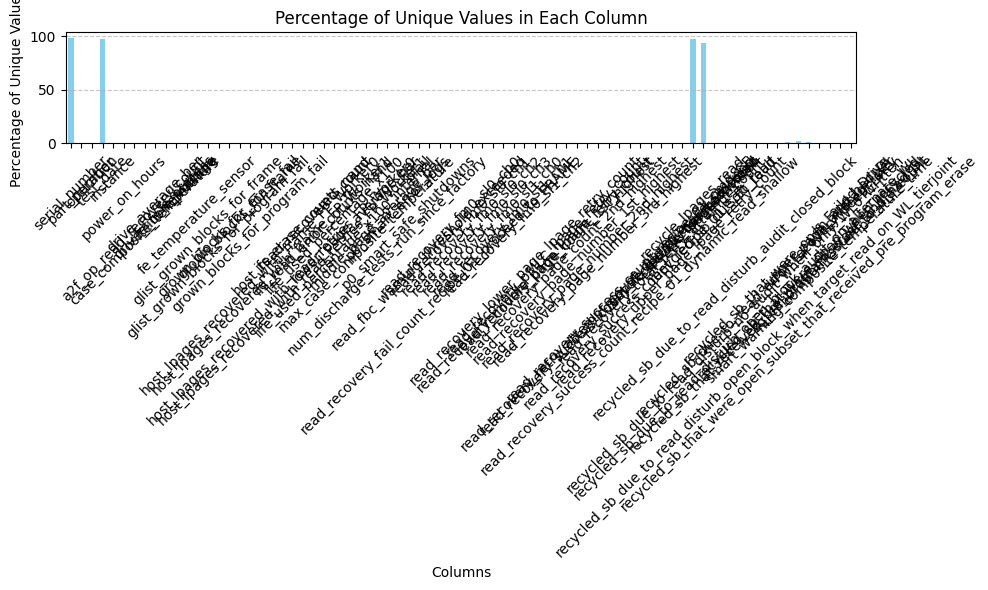

In [11]:
nunique = df_data_with_max_poh.nunique()
nunique.columns=['column','uniquevalues']
nunique.to_csv('data_uniqueness.csv')
nunique
unique_percentages = (df_data_with_max_poh.nunique() / df_data_with_max_poh.shape[0]) * 100
plt.figure(figsize=(10, 6))
unique_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Unique Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Unique Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Drop columns with a single unique value

In [12]:
cols_to_drop = nunique[nunique == 1].index
df_result = df_data.drop(cols_to_drop, axis=1)
df_data_with_max_poh = df_data_with_max_poh.drop(cols_to_drop, axis=1)

file_path = os.path.join(directory, 'df_data_with_max_poh.csv')
df_data_with_max_poh.to_csv(file_path)

In [13]:
df_data_with_max_poh.shape

(106842, 74)

EDA

In [14]:
df_data_with_max_poh.describe()

,test_date,instance,power_on_hours,a2f_op_read_recovery_count,case_composite_temperature,drive_average_ber,drive_life_remaining,fe_core_voltage,fe_process,fe_temperature_sensor,...,recycled_sb_due_to_read_disturb_open_block_audit_on_alternate_WL,recycled_sb_due_to_read_disturb_open_block_when_target_read_on_WL_tierjoint,recycled_sb_due_to_read_error_recovery_deep_retry,recycled_sb_that_received_pre_program_erase_and_had_DI,recycled_sb_that_were_open_and_had_DI,recycled_sb_that_were_open_subset_that_received_pre_program_erase,recycled_sb_that_were_open_when_recycled,smart_warning_composite_temperature_time,upper_page_average_ber,zq_calibration_issued_to_die_count
count,106842,1.068420e+05,106842.000000,106842.000000,106842.000000,106842.000000,106842.000000,106842.000000,106842.000000,106842.000000,...,106842.000000,106842.000000,106842.000000,106842.000000,106842.000000,106842.000000,106842.00000,106842.000000,106842.000000,106842.000000
mean,2021-05-15 09:50:15.330974720,1.783555e+05,9.045918,0.000524,58.380028,162.697815,99.021471,26.877202,2.602675,64.585126,...,0.054819,0.000019,0.023727,0.099053,582.906217,8406.014573,241.83660,0.276623,77.810309,1139.010951
min,2019-12-07 20:14:23,3.010000e+02,0.000000,0.000000,30.000000,0.000000,97.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2021-05-08 03:30:50.500000,3.031200e+04,8.000000,0.000000,57.000000,147.000000,99.000000,0.000000,2.000000,61.000000,...,0.000000,0.000000,0.000000,0.000000,468.000000,8486.000000,144.00000,0.000000,73.000000,640.000000
50%,2021-05-15 15:17:49.500000,3.030820e+05,8.000000,0.000000,57.000000,166.000000,99.000000,0.000000,3.000000,62.000000,...,0.000000,0.000000,0.000000,0.000000,619.000000,8733.000000,251.00000,0.000000,79.000000,640.000000
75%,2021-05-24 00:37:05.249999872,3.030820e+05,10.000000,0.000000,58.000000,185.000000,99.000000,0.000000,3.000000,62.000000,...,0.000000,0.000000,0.000000,0.000000,641.000000,8757.000000,272.00000,0.000000,85.000000,768.000000
max,2022-05-25 10:49:44,2.480100e+06,1283.000000,1.000000,32767.000000,931.000000,100.000000,844.000000,3.000000,32767.000000,...,148.000000,1.000000,481.000000,1109.000000,4890.000000,22568.000000,3824.00000,5185.000000,942.000000,41984.000000
std,NaN,1.344777e+05,6.475268,0.022888,200.162578,38.880263,0.145142,146.666211,0.595611,331.856511,...,0.707857,0.004327,2.347484,7.922495,261.349193,2462.369835,174.54991,16.128904,15.771894,2890.899303


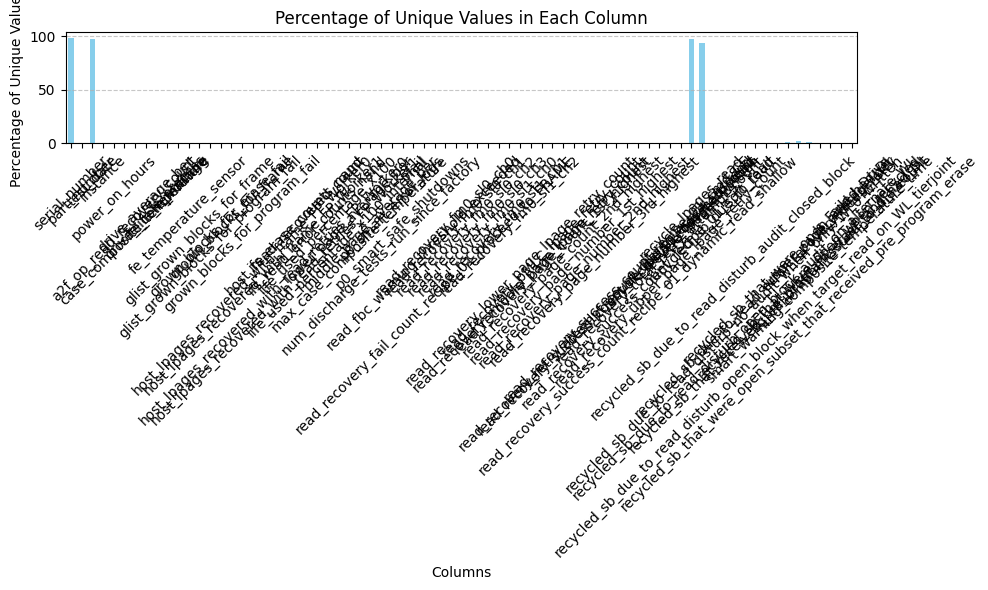

In [15]:
nunique = df_data_with_max_poh.nunique()
nunique.columns=['column','uniquevalues']
unique_percentages = (df_data_with_max_poh.nunique() / df_data_with_max_poh.shape[0]) * 100
plt.figure(figsize=(10, 6))
unique_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Unique Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Unique Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
file_path = os.path.join(directory, 'features_info.csv')
nunique.to_csv(file_path)

In [17]:
df_data_with_max_poh.shape

(106842, 74)

Limiting to columns listed on Confluence

In [18]:
with pd.option_context('display.float_format', lambda x: '%.2f' % x):
    df_data_with_max_poh_desc = df_data_with_max_poh[['recycle_data_recovered_count','recycle_lpages_read','recycle_lpages_written','recycled_sb_due_to_fault','recycled_sb_due_to_read_disturb_audit_closed_block','recycled_sb_due_to_read_disturb_no_audit_when_only_WL0_written','recycled_sb_due_to_read_disturb_open_block_audit_on_alternate_WL','recycled_sb_due_to_read_disturb_open_block_when_target_read_on_WL_tierjoint','recycled_sb_due_to_read_error_recovery_deep_retry','recycled_sb_that_received_pre_program_erase_and_had_DI','recycled_sb_that_were_open_and_had_DI','recycled_sb_that_were_open_subset_that_received_pre_program_erase','recycled_sb_that_were_open_when_recycled','a2f_op_read_recovery_count','host_lpages_recovered_with_frame_FP_Worker0','host_lpages_recovered_with_frame_FP_Worker1','host_lpages_recovered_with_read_retries_FP_Worker0','host_lpages_recovered_with_read_retries_FP_Worker1','host_read_recovered_count','read_recovery_fail_count_recipe_01_proceed_to_FRAME','read_recovery_fm0_sl0_ch0','read_recovery_fm0_sl0_ch1','read_recovery_fm0_sl0_ch2','read_recovery_fm0_sl0_ch3','read_recovery_fm0_sl1_ch0','read_recovery_fm0_sl1_ch1','read_recovery_fm0_sl1_ch2','read_recovery_lower_page_lpage_retry_count','read_recovery_middle_page_lpage_retry_count','read_recovery_pMLC_lpage_retry_count','read_recovery_page_count_1st_highest','read_recovery_page_count_2nd_highest','read_recovery_page_number_1st_highest','read_recovery_page_number_2nd_highest','read_recovery_page_number_3rd_highest','read_recovery_retry_attempt_count_during_erase_suspend','read_recovery_success_count_recipe_01_bes_hard_read','read_recovery_success_count_recipe_01_cmd_CF','read_recovery_success_count_recipe_01_dynamic_read_shallow','read_recovery_success_count_recipe_01_soft_read','read_recovery_total_retry_attempt_count','read_recovery_upper_page_lpage_retry_count','glist_grown_blocks_for_frame','glist_grown_blocks_for_program_fail','grown_blocks_for_erase_fail','grown_blocks_for_frame','grown_blocks_for_program_fail','drive_average_ber','lower_page_average_ber','middle_page_average_ber','upper_page_average_ber','ifs_read_error_counts_nand','p0_smart_error_logs','ifs_erase_counts_nand','read_fbc_warning_threshold_exceeded','smart_warning_composite_temperature_time','case_composite_temperature','max_case_composite_temperature','drive_life_remaining','fe_core_voltage','fe_process','fe_temperature_sensor','life_used_percentage_x100','life_used_percentage_x100_internal','p0_smart_safe_shutdowns','num_discharge_tests_run_since_factory','zq_calibration_issued_to_die_count','pfail']].describe()
    print (df_data_with_max_poh_desc)

       recycle_data_recovered_count  recycle_lpages_read  \
count                     106842.00            106842.00   
mean                          10.45        1961924265.94   
std                         1499.94        4598460328.19   
min                            0.00                 0.00   
25%                            0.00        1167874941.00   
50%                            0.00        1194580200.00   
75%                            0.00        1214431322.50   
max                       417680.00      185018559691.00   

       recycle_lpages_written  recycled_sb_due_to_fault  \
count               106842.00                 106842.00   
mean            1923484026.05                      0.04   
std             4600249996.13                      2.66   
min                      0.00                      0.00   
25%             1167224124.00                      0.00   
50%             1193647174.00                      0.00   
75%             1211787011.00                 

In [19]:
f_data = df_data_with_max_poh[['recycle_data_recovered_count','recycle_lpages_read','recycle_lpages_written','recycled_sb_due_to_fault','recycled_sb_due_to_read_disturb_audit_closed_block','recycled_sb_due_to_read_disturb_no_audit_when_only_WL0_written','recycled_sb_due_to_read_disturb_open_block_audit_on_alternate_WL','recycled_sb_due_to_read_disturb_open_block_when_target_read_on_WL_tierjoint','recycled_sb_due_to_read_error_recovery_deep_retry','recycled_sb_that_received_pre_program_erase_and_had_DI','recycled_sb_that_were_open_and_had_DI','recycled_sb_that_were_open_subset_that_received_pre_program_erase','recycled_sb_that_were_open_when_recycled','a2f_op_read_recovery_count','host_lpages_recovered_with_frame_FP_Worker0','host_lpages_recovered_with_frame_FP_Worker1','host_lpages_recovered_with_read_retries_FP_Worker0','host_lpages_recovered_with_read_retries_FP_Worker1','host_read_recovered_count','read_recovery_fail_count_recipe_01_proceed_to_FRAME','read_recovery_fm0_sl0_ch0','read_recovery_fm0_sl0_ch1','read_recovery_fm0_sl0_ch2','read_recovery_fm0_sl0_ch3','read_recovery_fm0_sl1_ch0','read_recovery_fm0_sl1_ch1','read_recovery_fm0_sl1_ch2','read_recovery_lower_page_lpage_retry_count','read_recovery_middle_page_lpage_retry_count','read_recovery_pMLC_lpage_retry_count','read_recovery_page_count_1st_highest','read_recovery_page_count_2nd_highest','read_recovery_page_number_1st_highest','read_recovery_page_number_2nd_highest','read_recovery_page_number_3rd_highest','read_recovery_retry_attempt_count_during_erase_suspend','read_recovery_success_count_recipe_01_bes_hard_read','read_recovery_success_count_recipe_01_cmd_CF','read_recovery_success_count_recipe_01_dynamic_read_shallow','read_recovery_success_count_recipe_01_soft_read','read_recovery_total_retry_attempt_count','read_recovery_upper_page_lpage_retry_count','glist_grown_blocks_for_frame','glist_grown_blocks_for_program_fail','grown_blocks_for_erase_fail','grown_blocks_for_frame','grown_blocks_for_program_fail','drive_average_ber','lower_page_average_ber','middle_page_average_ber','upper_page_average_ber','ifs_read_error_counts_nand','p0_smart_error_logs','ifs_erase_counts_nand','read_fbc_warning_threshold_exceeded','smart_warning_composite_temperature_time','case_composite_temperature','max_case_composite_temperature','drive_life_remaining','fe_core_voltage','fe_process','fe_temperature_sensor','life_used_percentage_x100','life_used_percentage_x100_internal','p0_smart_safe_shutdowns','num_discharge_tests_run_since_factory','zq_calibration_issued_to_die_count','pfail']]
file_path = os.path.join(directory, 'f_data.csv')
f_data.to_csv(file_path)
f_data.shape

(106842, 68)

In [20]:
f_data.describe()

,recycle_data_recovered_count,recycle_lpages_read,recycle_lpages_written,recycled_sb_due_to_fault,recycled_sb_due_to_read_disturb_audit_closed_block,recycled_sb_due_to_read_disturb_no_audit_when_only_WL0_written,recycled_sb_due_to_read_disturb_open_block_audit_on_alternate_WL,recycled_sb_due_to_read_disturb_open_block_when_target_read_on_WL_tierjoint,recycled_sb_due_to_read_error_recovery_deep_retry,recycled_sb_that_received_pre_program_erase_and_had_DI,...,drive_life_remaining,fe_core_voltage,fe_process,fe_temperature_sensor,life_used_percentage_x100,life_used_percentage_x100_internal,p0_smart_safe_shutdowns,num_discharge_tests_run_since_factory,zq_calibration_issued_to_die_count,pfail
count,106842.000000,1.068420e+05,1.068420e+05,106842.000000,106842.000000,106842.000000,106842.000000,106842.000000,106842.000000,106842.000000,...,106842.000000,106842.000000,106842.000000,106842.000000,106842.000000,106842.000000,106842.000000,106842.000000,106842.000000,106842.000000
mean,10.453558,1.961924e+09,1.923484e+09,0.036559,0.052180,186.466231,0.054819,0.000019,0.023727,0.099053,...,99.021471,26.877202,2.602675,64.585126,3.524363,3.691938,1.837676,45.796503,1139.010951,32.287078
std,1499.935892,4.598460e+09,4.600250e+09,2.664495,11.004203,44.989247,0.707857,0.004327,2.347484,7.922495,...,0.145142,146.666211,0.595611,331.856511,2.670701,2.863640,9.666968,40.525796,2890.899303,11.408422
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,97.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.167875e+09,1.167224e+09,0.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.000000,...,99.000000,0.000000,2.000000,61.000000,3.000000,3.000000,0.000000,30.000000,640.000000,22.000000
50%,0.000000,1.194580e+09,1.193647e+09,0.000000,0.000000,205.000000,0.000000,0.000000,0.000000,0.000000,...,99.000000,0.000000,3.000000,62.000000,3.000000,3.000000,0.000000,46.000000,640.000000,38.000000
75%,0.000000,1.214431e+09,1.211787e+09,0.000000,0.000000,212.000000,0.000000,0.000000,0.000000,0.000000,...,99.000000,0.000000,3.000000,62.000000,3.000000,3.000000,0.000000,46.000000,768.000000,38.000000
max,417680.000000,1.850186e+11,1.849902e+11,743.000000,3411.000000,686.000000,148.000000,1.000000,481.000000,1109.000000,...,100.000000,844.000000,3.000000,32767.000000,265.000000,267.000000,160.000000,905.000000,41984.000000,476.000000


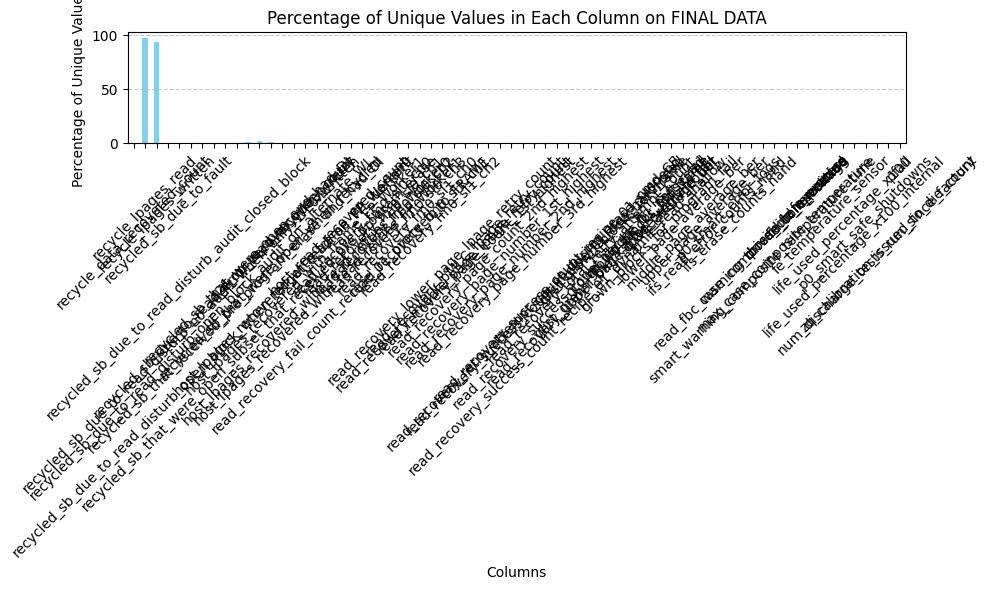

In [21]:
nuniquef_data = f_data.nunique()
nuniquef_data.columns=['column','uniquevalues']
unique_percentages = (f_data.nunique() / f_data.shape[0]) * 100
plt.figure(figsize=(10, 6))
unique_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Unique Values in Each Column on FINAL DATA')
plt.xlabel('Columns')
plt.ylabel('Percentage of Unique Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

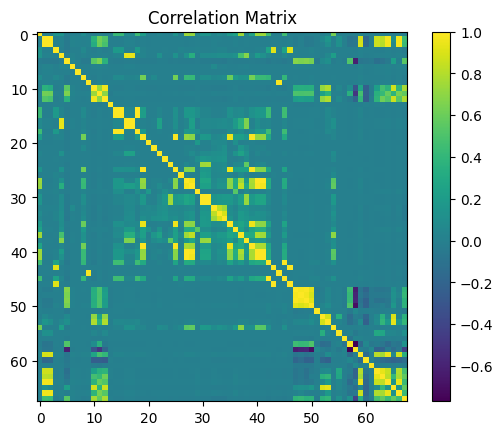

In [22]:
f_data_corr= f_data.corr()
plt.imshow(f_data_corr, cmap='viridis', interpolation='nearest')
plt.colorbar()  
plt.title('Correlation Matrix')
plt.show()

Correlation between features

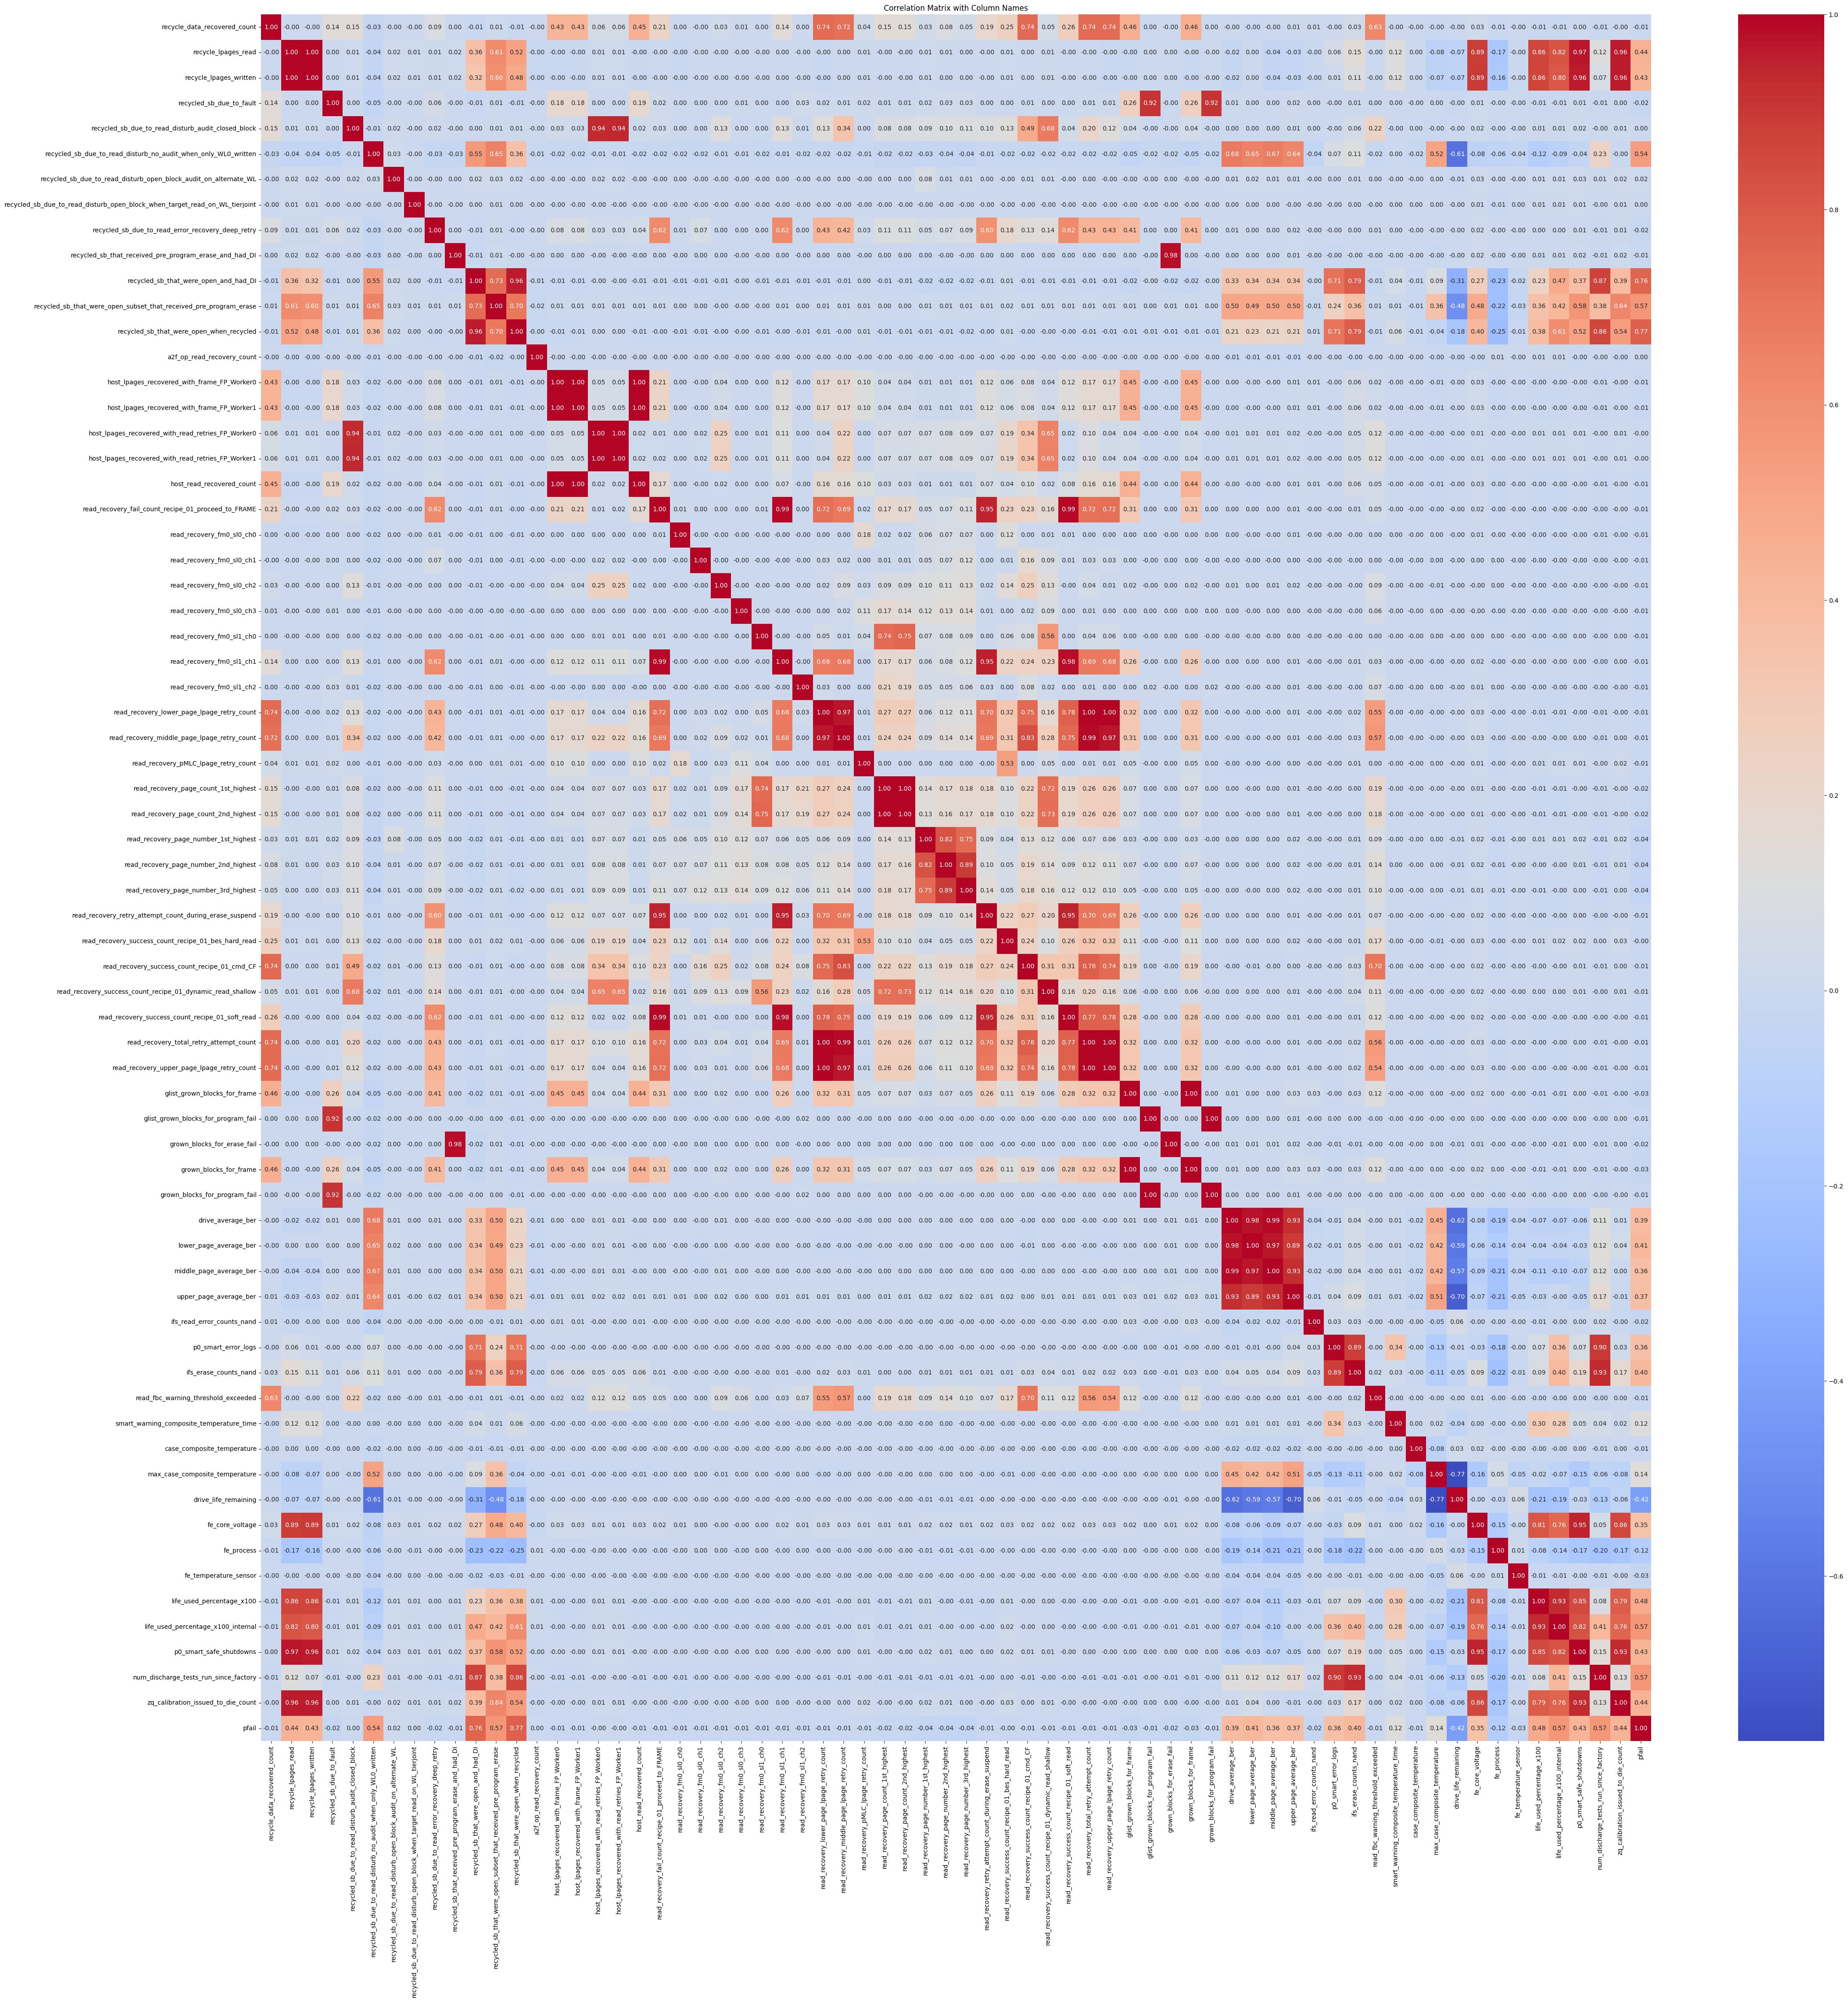

In [23]:
plt.figure(figsize=(50, 50))  
sns.heatmap(f_data_corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=f_data_corr.columns,
            yticklabels=f_data_corr.columns)
plt.title('Correlation Matrix with Column Names')
plt.show()

Standard Scaler (Normalization)

In [24]:
# min_max_scaler = MinMaxScaler()
# min_max_scaler.fit(f_data)
# standard_scaler_data = min_max_scaler.transform(f_data)
# standard_scaler_data.shape

standard_scaler = StandardScaler()

standard_scaler_data = standard_scaler.fit_transform(f_data)

USING ISOLATION FOREST ALOGRITHM

In [25]:
iso_forest = IsolationForest(n_estimators=69, contamination=0.01, random_state=random_number)
iso_forest.fit(standard_scaler_data)
predictions = iso_forest.predict(standard_scaler_data)

In [26]:
anomalies = standard_scaler_data[predictions == -1]
anomalies.shape

(1069, 68)

In [27]:
predictions_df = pd.DataFrame(predictions, columns=['Predictions'])
print(predictions_df)
df_data_with_max_poh_iso = pd.DataFrame(df_data_with_max_poh)
df_data_with_max_poh_iso['Predictions'] = 0
for index, row in df_data_with_max_poh_iso.iterrows():
    df_data_with_max_poh_iso.at[index, 'Predictions'] = predictions_df.at[index, 'Predictions']

        Predictions
0                 1
1                -1
2                 1
3                 1
4                 1
...             ...
106837            1
106838            1
106839            1
106840            1
106841            1

[106842 rows x 1 columns]


USING K_MEANS ALGORITHM

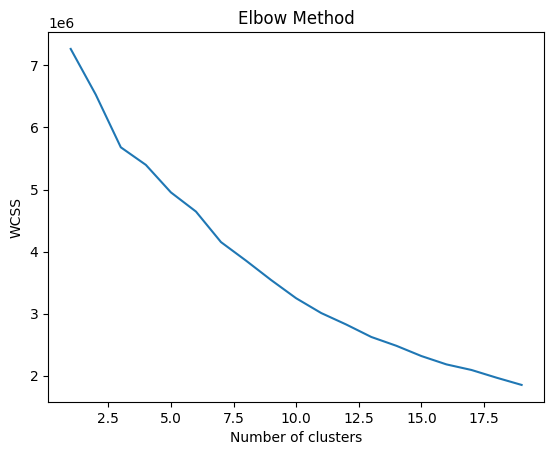

In [28]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=20, random_state=random_number)
    kmeans.fit(standard_scaler_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


98580 3280 1 1
106842


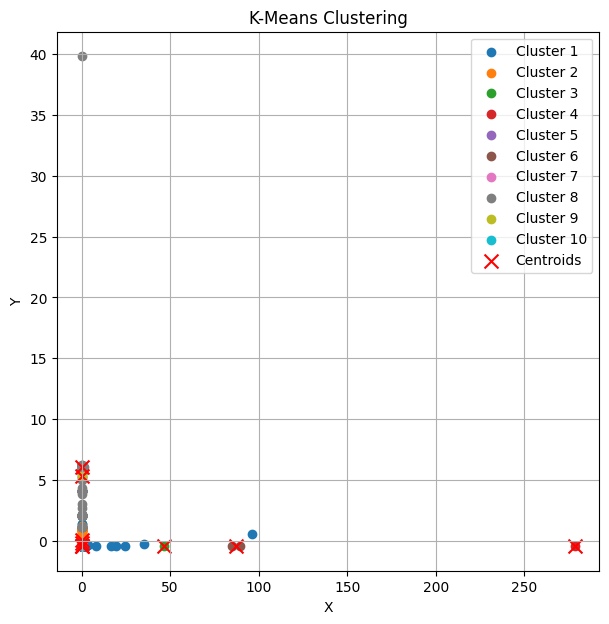

In [29]:

k = 10
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=9)
kmeans.fit(standard_scaler_data)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
kmeans_cluster_labels = labels
kmeans_labeled_data = [(point, label) for point, label in zip(standard_scaler_data, labels)]
print(len(standard_scaler_data[labels == 0]),len(standard_scaler_data[labels == 1]),len(standard_scaler_data[labels == 2]),len(standard_scaler_data[labels == 3]))
print(len(labels))
[(point, label) for point, label in zip(standard_scaler_data, labels)]
plt.figure(figsize=(7, 7))
for i in range(k):
    cluster_points = standard_scaler_data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


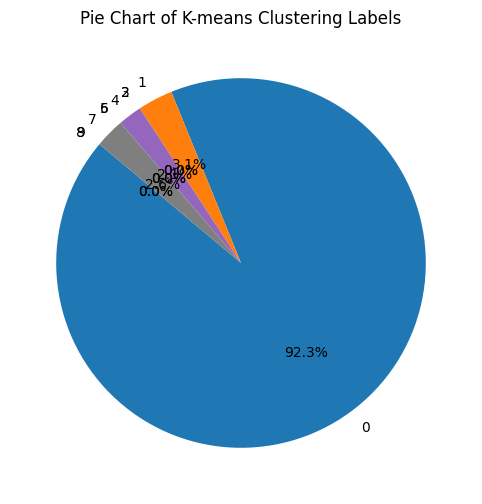

In [30]:
label_counts = np.bincount(labels)
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=np.unique(labels), autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of K-means Clustering Labels')
plt.show()

ISOLATION FOREST WITH HYPERPARAMS

In [31]:
iso_forest_1 = IsolationForest(n_estimators=69, contamination=0.01, random_state=random_number, max_features=1.0, max_samples=1.0)
iso_forest_1.fit_predict(standard_scaler_data)

predictions_1 = iso_forest_1.predict(standard_scaler_data)
anomalies = standard_scaler_data[predictions_1 == -1]
anomalies.shape

predictions_df_1 = pd.DataFrame(predictions_1, columns=['Predictions'])

ISOLATION FOREST ALGORITHM WITH HYPERPARAMETER TUNNING # 2

In [32]:
iso_forest_2 = IsolationForest(n_estimators=200, contamination=0.01, random_state=random_number, max_features=1.0, max_samples=1.0)
iso_forest_2.fit(standard_scaler_data)

predictions_2 = iso_forest_2.predict(standard_scaler_data)
anomalies = standard_scaler_data[predictions_2 == -1]
anomalies.shape

predictions_df_2 = pd.DataFrame(predictions_2, columns=['Predictions'])

EllipticEnvelope ALGORITHM

In [33]:
ee_model = EllipticEnvelope(support_fraction=1., contamination=0.1)
ee_model.fit(standard_scaler_data)
predictions_ee = ee_model.predict(standard_scaler_data)
print(predictions_ee)
mahalanobis_distances = ee_model.mahalanobis(standard_scaler_data)
predictions_ee = pd.DataFrame(predictions_ee, columns=['Predictions'])

[-1 -1 -1 ...  1  1  1]


Local Outlier Factor ALGORITHM

In [34]:

# Initialize the LOF model
lof = LocalOutlierFactor(n_neighbors=324, novelty=False)

# Fit the model and predict outliers
lof_y_pred = lof.fit_predict(standard_scaler_data)

# Find the number of outliers detected
n_outliers = (lof_y_pred == -1).sum()
print(f"Number of outliers detected: {n_outliers}")
predictions_lof = pd.DataFrame(lof_y_pred, columns=['Predictions'])

Number of outliers detected: 7518


ONECLASS SVM ALGORITHM

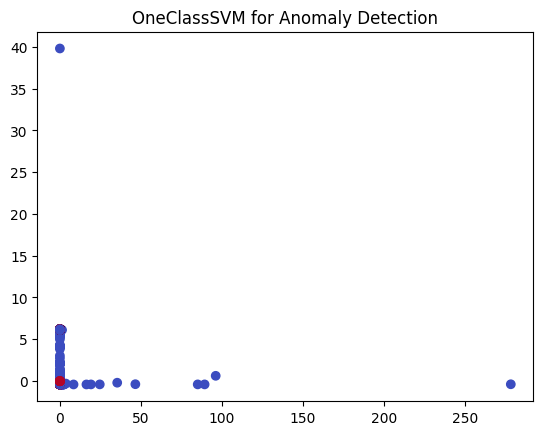

In [35]:

ocsvm = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)

ocsvm.fit(standard_scaler_data)
pred_oneSVM = ocsvm.predict(standard_scaler_data)

# Plot the data
plt.scatter(standard_scaler_data[:, 0], standard_scaler_data[:, 1], c=pred_oneSVM, cmap='coolwarm')
plt.title("OneClassSVM for Anomaly Detection")
plt.show()

predictions_oneSVM = pd.DataFrame(pred_oneSVM, columns=['Predictions'])

In [36]:
df_data_with_max_poh_iso = pd.DataFrame(df_data_with_max_poh)
df_data_with_max_poh_iso['Predictions'] = 0
df_data_with_max_poh_iso['iso_forest_1_Predictions'] = 0
df_data_with_max_poh_iso['iso_forest_2_Predictions'] = 0
df_data_with_max_poh_iso['EllipticEnvelope_Predictions'] = 0
df_data_with_max_poh_iso['LOF_Predictions'] = 0
df_data_with_max_poh_iso['ONESVM_Predictions'] = 0
df_data_with_max_poh_iso['CLUSTERS'] = -1
for index, row in df_data_with_max_poh_iso.iterrows():
    df_data_with_max_poh_iso.at[index, 'Predictions'] = predictions_df.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'iso_forest_1_Predictions'] = predictions_df_1.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'iso_forest_2_Predictions'] = predictions_df_2.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'EllipticEnvelope_Predictions'] = predictions_ee.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'LOF_Predictions'] = predictions_lof.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'ONESVM_Predictions'] = predictions_oneSVM.at[index, 'Predictions']
    df_data_with_max_poh_iso.at[index, 'CLUSTERS'] = kmeans_cluster_labels[index]

file_path = os.path.join(directory, f'all_predictions_{formatted_now}.csv')
df_data_with_max_poh_iso.to_csv(file_path)


In [37]:
df_data_with_max_poh.to_csv('df_data_with_max_poh_may_2021_with_failed_data')
